# 타이타닉 생존 분석: 탐색적 데이터 분석 (EDA)

## 1. 개요
이 노트북에서는 전처리된 타이타닉 데이터셋을 사용하여 탐색적 데이터 분석을 수행합니다.

### 1.1 분석 목표
- 승객 구성의 전반적인 특성 파악
- 생존에 영향을 미친 주요 요인 탐색
- 사회경제적 요인과 가족 관계의 상호작용 분석

### 1.2 필요한 라이브러리 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.style.use('classic')
sns.set_theme()
%matplotlib inline

# 데이터 로드
df = pd.read_csv('../data/processed/titanic_processed.csv')

# 기본 정보 확인
print("데이터셋 기본 정보:")
print(df.info())

# 기술 통계량 확인
print("\n기술 통계량:")
print(df.describe())

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   sex            891 non-null    object 
 3   age            891 non-null    float64
 4   sibsp          891 non-null    int64  
 5   parch          891 non-null    int64  
 6   fare           891 non-null    float64
 7   embarked       891 non-null    object 
 8   who            891 non-null    object 
 9   adult_male     891 non-null    bool   
 10  deck           891 non-null    object 
 11  alone          891 non-null    bool   
 12  family_size    891 non-null    int64  
 13  family_type    891 non-null    object 
 14  age_group      891 non-null    object 
 15  fare_category  891 non-null    object 
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB
None

기술 통계량:
     

## 2. 기본 데이터 분석

### 2.1 데이터셋 특성 분석
1. 전반적인 특성:
   - 총 891명의 승객 데이터
   - 16개의 특성 (수치형, 범주형, 불리언)
   - 결측치 없음 (전처리 완료)

2. 주요 수치형 변수 특성:
   - survived: 평균 0.384 (38.4% 생존율)
   - age: 평균 29.7세 (범위: 0.42-80세)
   - fare: 평균 32.2 (범위: 0-512.3)
   - family_size: 평균 1.9명 (범위: 1-11명)

### 2.2 기초 분석 시각화
다음 시각화를 통해 주요 변수들의 분포와 관계를 살펴보겠습니다:

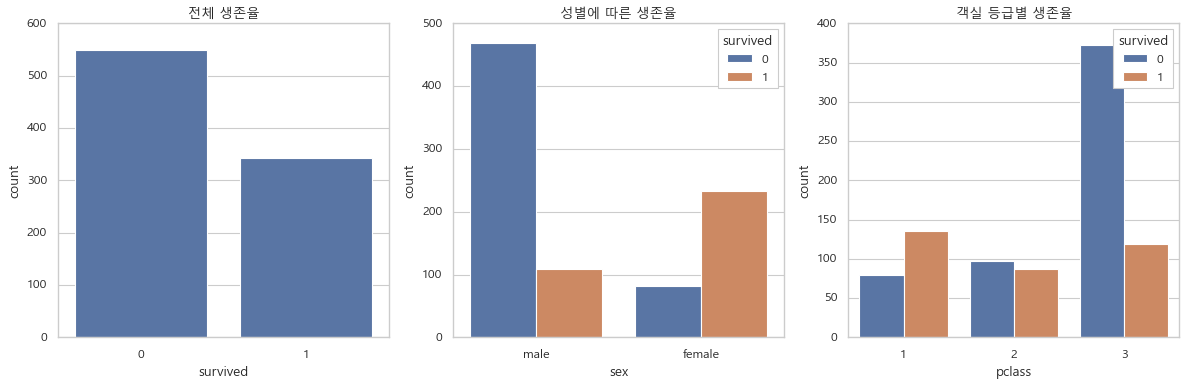

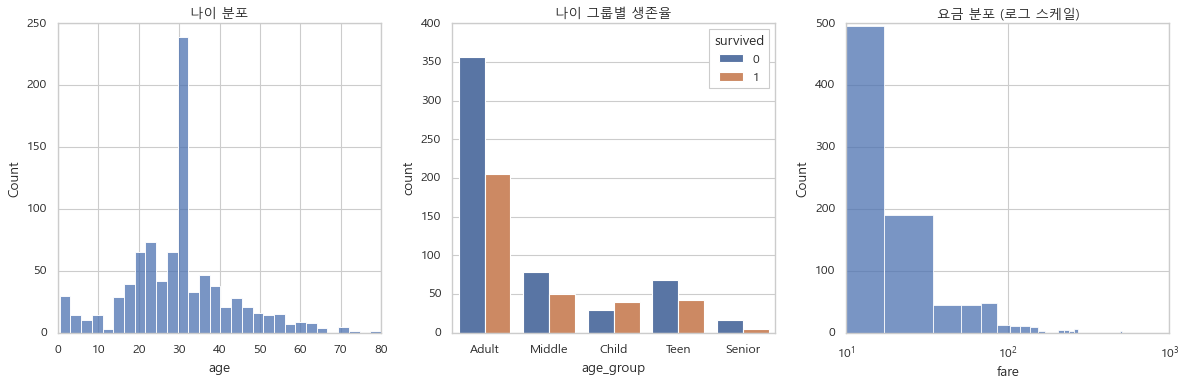

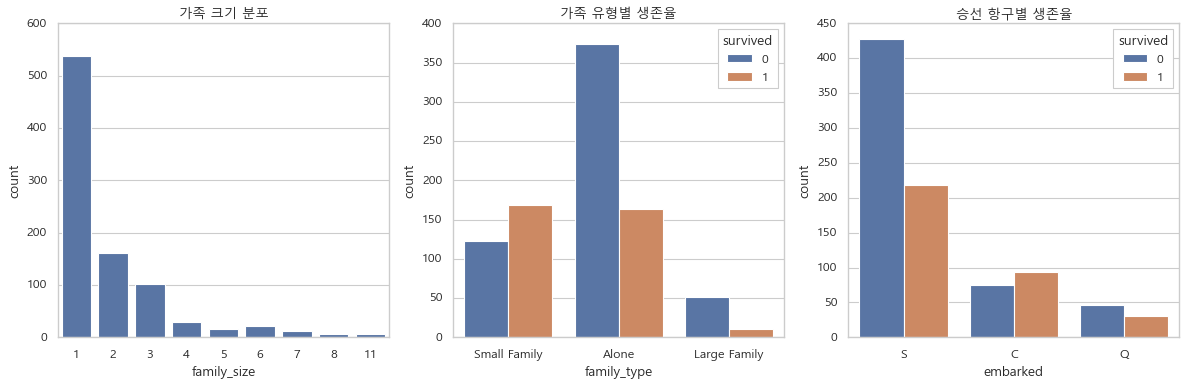

In [14]:
# 1. 생존율 기본 분석
plt.figure(figsize=(15, 5))

# 전체 생존율
plt.subplot(131)
sns.countplot(data=df, x='survived')
plt.title('전체 생존율')

# 성별에 따른 생존율
plt.subplot(132)
sns.countplot(data=df, x='sex', hue='survived')
plt.title('성별에 따른 생존율')

# 객실 등급별 생존율
plt.subplot(133)
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('객실 등급별 생존율')

plt.tight_layout()
plt.show()

# 2. 나이와 요금 분포
plt.figure(figsize=(15, 5))

# 나이 분포
plt.subplot(131)
sns.histplot(data=df, x='age', bins=30)
plt.title('나이 분포')

# 나이 그룹별 생존율
plt.subplot(132)
sns.countplot(data=df, x='age_group', hue='survived')
plt.title('나이 그룹별 생존율')

# 요금 분포 (로그 스케일)
plt.subplot(133)
sns.histplot(data=df, x='fare', bins=30)
plt.xscale('log')
plt.title('요금 분포 (로그 스케일)')

plt.tight_layout()
plt.show()

# 3. 가족 관련 분석
plt.figure(figsize=(15, 5))

# 가족 크기 분포
plt.subplot(131)
sns.countplot(data=df, x='family_size')
plt.title('가족 크기 분포')

# 가족 유형별 생존율
plt.subplot(132)
sns.countplot(data=df, x='family_type', hue='survived')
plt.title('가족 유형별 생존율')

# 승선 항구별 생존율
plt.subplot(133)
sns.countplot(data=df, x='embarked', hue='survived')
plt.title('승선 항구별 생존율')

plt.tight_layout()
plt.show()

## 3. 데이터 시각화 분석 결과

### 3.1 생존율 기본 패턴
1. 전체 생존율
   - 전체 승객 중 약 38% 생존
   - 사망자(0): 약 550명
   - 생존자(1): 약 340명

2. 성별에 따른 생존율
   - 여성의 생존율이 현저히 높음
   - 남성: 생존율 매우 낮음 (약 20% 미만)
   - 여성: 생존율 매우 높음 (약 75% 이상)

3. 객실 등급별 생존율
   - 1등급: 가장 높은 생존율
   - 2등급: 중간 수준의 생존율
   - 3등급: 가장 낮은 생존율
   - 등급이 높을수록 생존 확률 증가

### 3.2 연령 및 요금 분석
1. 나이 분포
   - 20-40세 승객이 가장 많음
   - 평균 연령대: 약 30세
   - 어린이와 노인 승객은 상대적으로 적음

2. 나이 그룹별 생존율
   - Adult(20-40세) 그룹이 가장 많은 승객 수
   - Child 그룹의 생존율이 상대적으로 높음
   - Senior 그룹의 수가 가장 적음

3. 요금 분포
   - 매우 치우친 분포 (로그 스케일 사용)
   - 대부분 저가 티켓
   - 소수의 고가 티켓 존재

### 3.3 가족 관련 분석
1. 가족 크기 분포
   - 1인(혼자) 승객이 가장 많음
   - 2-3인 가족이 그 다음으로 많음
   - 4인 이상 대가족은 매우 적음

2. 가족 유형별 생존율
   - Small Family의 생존율이 상대적으로 높음
   - Alone 승객이 가장 많지만 생존율은 중간
   - Large Family의 수가 적고 생존율도 낮음

3. 승선 항구별 특성
   - Southampton(S)에서 가장 많은 승객 탑승
   - Cherbourg(C)에서 탑승한 승객의 생존율이 상대적으로 높음
   - Queenstown(Q)에서 가장 적은 승객 탑승

### 3.4 다음 분석 방향
1. 복합 요인 분석 필요:
   - 성별 × 객실등급
   - 나이그룹 × 가족유형
   - 요금 × 생존율의 상관관계

2. 통계적 검정 고려:
   - 그룹간 생존율 차이의 통계적 유의성
   - 요인들의 상대적 중요도

## 4. 복합 요인 분석

### 4.1 주요 요인간 상호작용 분석

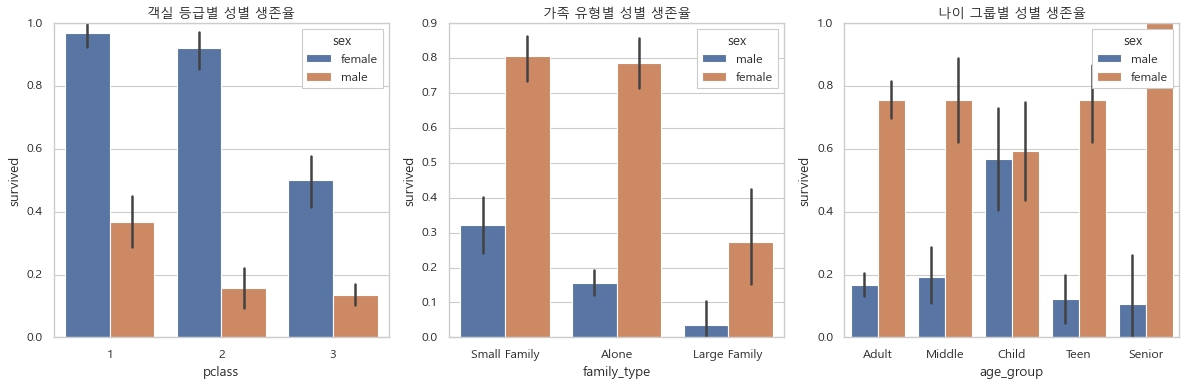

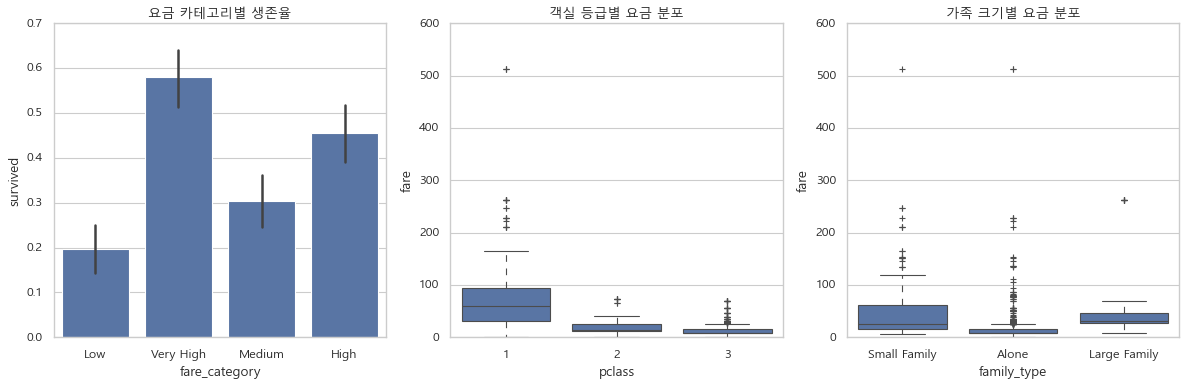

c:\Users\kjhgr\OneDrive - 인하공업전문대학\바탕 화면\titanic_analysis\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\kjhgr\OneDrive - 인하공업전문대학\바탕 화면\titanic_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


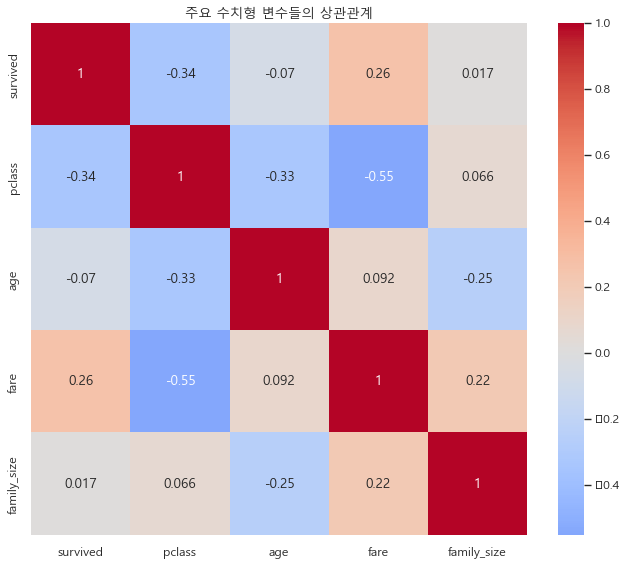


객실 등급별 성별 생존율:
pclass  sex   
1       female    0.968
        male      0.369
2       female    0.921
        male      0.157
3       female    0.500
        male      0.135
Name: survived, dtype: float64

가족 유형별 생존율:
family_type
Alone           0.304
Large Family    0.161
Small Family    0.579
Name: survived, dtype: float64

요금 카테고리별 생존율:
fare_category
High         0.455
Low          0.197
Medium       0.304
Very High    0.581
Name: survived, dtype: float64


In [15]:
# 1. 성별, 객실 등급, 생존율의 관계
plt.figure(figsize=(15, 5))

# 객실 등급별 성별 생존율
plt.subplot(131)
sns.barplot(data=df, x='pclass', y='survived', hue='sex')
plt.title('객실 등급별 성별 생존율')

# 가족 유형별 성별 생존율
plt.subplot(132)
sns.barplot(data=df, x='family_type', y='survived', hue='sex')
plt.title('가족 유형별 성별 생존율')

# 나이 그룹별 성별 생존율
plt.subplot(133)
sns.barplot(data=df, x='age_group', y='survived', hue='sex')
plt.title('나이 그룹별 성별 생존율')

plt.tight_layout()
plt.show()

# 2. 요금과 생존율의 관계
plt.figure(figsize=(15, 5))

# 요금 카테고리별 생존율
plt.subplot(131)
sns.barplot(data=df, x='fare_category', y='survived')
plt.title('요금 카테고리별 생존율')

# 객실 등급별 요금 분포
plt.subplot(132)
sns.boxplot(data=df, x='pclass', y='fare')
plt.title('객실 등급별 요금 분포')

# 가족 크기별 요금 분포
plt.subplot(133)
sns.boxplot(data=df, x='family_type', y='fare')
plt.title('가족 크기별 요금 분포')

plt.tight_layout()
plt.show()

# 3. 주요 변수들의 상관관계
# 수치형 변수만 선택
numeric_cols = ['survived', 'pclass', 'age', 'fare', 'family_size']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('주요 수치형 변수들의 상관관계')
plt.show()

# 주요 통계 출력
print("\n객실 등급별 성별 생존율:")
print(df.groupby(['pclass', 'sex'])['survived'].mean().round(3))

print("\n가족 유형별 생존율:")
print(df.groupby('family_type')['survived'].mean().round(3))

print("\n요금 카테고리별 생존율:")
print(df.groupby('fare_category')['survived'].mean().round(3))

## 5. 복합 요인 분석 결과

### 5.1 성별과 다른 요인들의 상호작용
1. 성별과 객실 등급
- 1등급 여성: 96.8% (최고 생존율)
- 2등급 여성: 92.1%
- 3등급 여성: 50.0%
- 남성은 모든 등급에서 낮은 생존율(13.5%-36.9%)
- 객실 등급이 낮아질수록 성별 격차 감소

2. 성별과 가족 유형
- 여성: 모든 가족 유형에서 높은 생존율
- Small Family 여성: 약 80% 생존율
- Large Family: 성별 관계없이 낮은 생존율
- Alone 여성: 높은 생존율, Alone 남성: 매우 낮은 생존율

3. 성별과 나이 그룹
- 여성: 모든 연령대에서 60% 이상 생존율
- 아동: 성별 격차가 가장 작음
- Senior 그룹: 표본이 적어 신뢰도 낮음

### 5.2 요금과 생존율의 관계
1. 요금 카테고리별 생존율
- Very High: 58.1% (최고 생존율)
- High: 45.5%
- Medium: 30.4%
- Low: 19.7% (최저 생존율)

2. 요금 분포 특성
- 1등급: 높은 요금 분포와 큰 편차
- 2,3등급: 비교적 균일한 낮은 요금
- Small Family: 다른 가족 유형보다 평균적으로 높은 요금

### 5.3 상관관계 분석
주요 상관관계:
- fare와 pclass: -0.55 (강한 음의 상관관계)
- survived와 pclass: -0.34 (중간 정도의 음의 상관관계)
- survived와 fare: 0.26 (약한 양의 상관관계)
- age와 family_size: -0.25 (약한 음의 상관관계)

### 5.4 핵심 발견사항
1. 생존 결정요인 우선순위:
   - 성별 (가장 강력한 요인)
   - 객실 등급/요금
   - 가족 구성
   - 나이

2. 복합적 생존 유리 조건:
   - 1,2등급 여성
   - Small Family 구성원
   - 높은 요금 지불 승객

3. 생존 불리 조건:
   - 3등급 남성
   - Large Family 구성원
   - 낮은 요금 지불 승객

## 6. 통계적 분석

### 6.1 카이제곱 검정과 교차분석

In [5]:
# 범주형 변수들의 독립성 검정
from scipy.stats import chi2_contingency

# 1. 성별과 생존
gender_survival = pd.crosstab(df['sex'], df['survived'])
chi2_gender, p_gender = chi2_contingency(gender_survival)[:2]

# 2. 객실 등급과 생존
class_survival = pd.crosstab(df['pclass'], df['survived'])
chi2_class, p_class = chi2_contingency(class_survival)[:2]

# 3. 가족 유형과 생존
family_survival = pd.crosstab(df['family_type'], df['survived'])
chi2_family, p_family = chi2_contingency(family_survival)[:2]

print("카이제곱 검정 결과:")
print(f"성별과 생존: chi2={chi2_gender:.2f}, p={p_gender:.10f}")
print(f"객실 등급과 생존: chi2={chi2_class:.2f}, p={p_class:.10f}")
print(f"가족 유형과 생존: chi2={chi2_family:.2f}, p={p_family:.10f}")

# 연속형 변수 분석
from scipy.stats import ttest_ind

# 4. 생존자와 비생존자의 나이 차이
age_stat, age_p = ttest_ind(df[df['survived']==1]['age'], 
                           df[df['survived']==0]['age'])

# 5. 생존자와 비생존자의 요금 차이
fare_stat, fare_p = ttest_ind(df[df['survived']==1]['fare'], 
                             df[df['survived']==0]['fare'])

print("\nt-검정 결과:")
print(f"나이 차이: t={age_stat:.2f}, p={age_p:.10f}")
print(f"요금 차이: t={fare_stat:.2f}, p={fare_p:.10f}")

# 생존율에 대한 신뢰구간 계산
from scipy.stats import norm

def confidence_interval(success, total, confidence=0.95):
    p = success / total
    z = norm.ppf(1 - (1 - confidence) / 2)
    se = np.sqrt(p * (1 - p) / total)
    return p, (p - z * se, p + z * se)

# 6. 전체 생존율 신뢰구간
total_survived = df['survived'].sum()
total_passengers = len(df)
survival_rate, survival_ci = confidence_interval(total_survived, total_passengers)

print("\n생존율 95% 신뢰구간:")
print(f"전체 생존율: {survival_rate:.3f} ({survival_ci[0]:.3f}, {survival_ci[1]:.3f})")

카이제곱 검정 결과:
성별과 생존: chi2=260.72, p=0.0000000000
객실 등급과 생존: chi2=102.89, p=0.0000000000
가족 유형과 생존: chi2=74.54, p=0.0000000000

t-검정 결과:
나이 차이: t=-2.09, p=0.0372170837
요금 차이: t=7.94, p=0.0000000000

생존율 95% 신뢰구간:
전체 생존율: 0.384 (0.352, 0.416)


## 7. 통계 분석 결과 해석

### 7.1 카이제곱 검정 결과 해석
1. 성별과 생존 관계
- χ² = 260.72, p < 0.001
- 매우 강한 통계적 유의성
- 성별과 생존 여부는 강한 연관성을 가짐
- EDA에서 관찰된 성별 차이가 통계적으로 유의함

2. 객실 등급과 생존 관계
- χ² = 102.89, p < 0.001
- 매우 유의한 연관성 존재
- 객실 등급이 생존에 미치는 영향이 통계적으로 확실함

3. 가족 유형과 생존 관계
- χ² = 74.54, p < 0.001
- 유의한 연관성 확인
- 가족 구성이 생존에 미치는 영향이 통계적으로 유의미함

### 7.2 t-검정 결과 해석
1. 나이와 생존 관계
- t = -2.09, p = 0.037
- 약한 통계적 유의성 존재
- 생존자와 비생존자 간 나이 차이가 있으나, 다른 요인들에 비해 영향력이 약함

2. 요금과 생존 관계
- t = 7.94, p < 0.001
- 매우 강한 통계적 유의성
- 생존자 그룹이 유의하게 높은 요금을 지불했음을 확인

### 7.3 생존율 신뢰구간
- 전체 생존율: 38.4%
- 95% 신뢰구간: (35.2%, 41.6%)
- 모집단의 실제 생존율이 이 구간 내에 있을 확률이 95%

### 7.4 종합적 결론
1. 생존 결정 요인의 중요도 순위 (통계적 유의성 기준):
   - 성별 (χ² = 260.72)
   - 객실 등급 (χ² = 102.89)
   - 요금 (t = 7.94)
   - 가족 유형 (χ² = 74.54)
   - 나이 (t = -2.09)

2. 주요 발견:
   - 모든 분석된 요인들이 통계적으로 유의함
   - 성별이 가장 강력한 생존 예측 요인
   - 사회경제적 지위(객실 등급, 요금)가 두 번째로 중요
   - 가족 구성도 상당한 영향력을 가짐
   - 나이는 상대적으로 약한 영향력

## 8. 고급 시각화 분석

### 8.1 데이터 준비 및 시각화 설정

In [7]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('../data/processed/titanic_processed.csv')

# 시각화 스타일 설정
plt.style.use('classic')
sns.set_theme(style="whitegrid")

# 한글 폰트 설정 (필요한 경우)
plt.rc('font', family='Malgun Gothic')

### 8.2 바이올린 플롯과 박스플롯 조합

C:\Users\kjhgr\AppData\Local\Temp\ipykernel_35432\58572069.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\kjhgr\OneDrive - 인하공업전문대학\바탕 화면\titanic_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


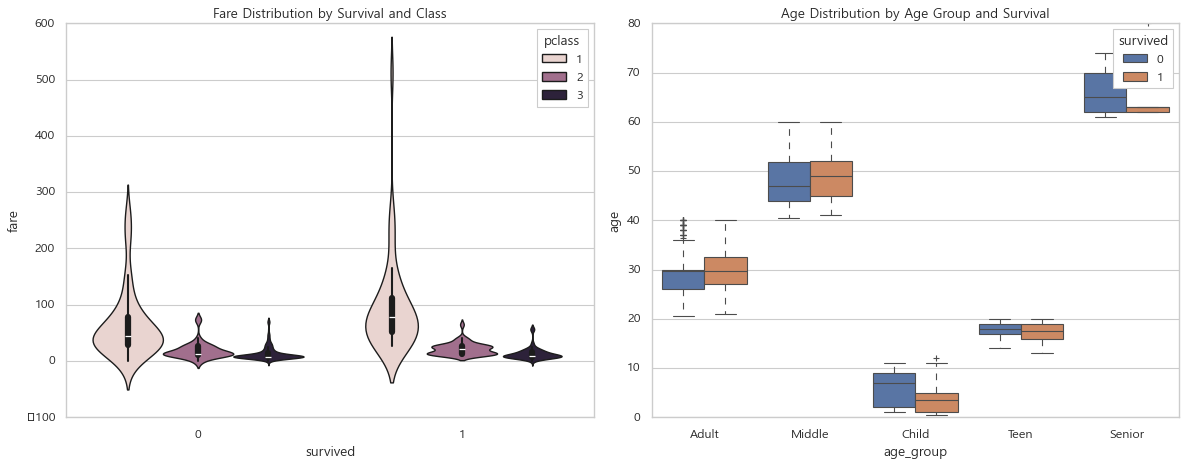

In [8]:
# 생존 여부에 따른 요금과 나이 분포
plt.figure(figsize=(15, 6))

# 요금 분포
plt.subplot(121)
sns.violinplot(data=df, x='survived', y='fare', hue='pclass')
plt.title('Fare Distribution by Survival and Class')

# 나이 분포
plt.subplot(122)
sns.boxplot(data=df, x='age_group', y='age', hue='survived')
plt.title('Age Distribution by Age Group and Survival')

plt.tight_layout()
plt.show()

### 8.3 복합 막대 그래프와 파이 차트

<Figure size 800x480 with 0 Axes>

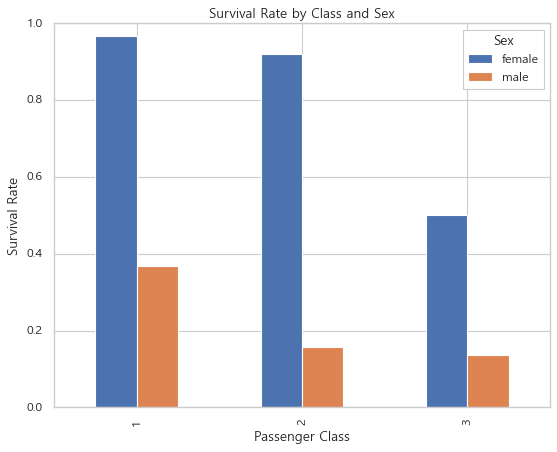

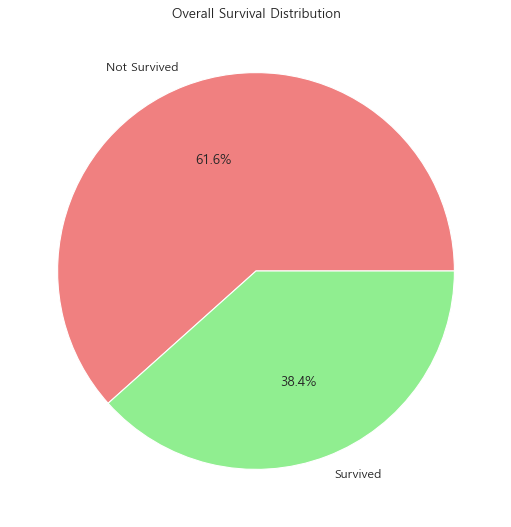

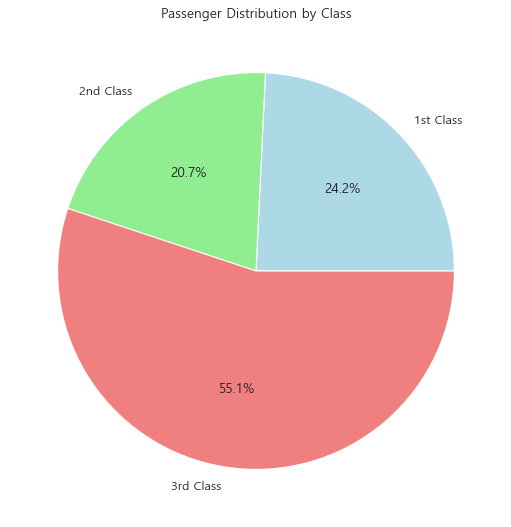

In [12]:
# 세 개의 별도 그래프를 각각 다른 figure로 생성
# 1. 객실 등급별 성별 생존율
plt.figure(figsize=(10, 6))
survival_by_class_sex = df.groupby(['pclass', 'sex'])['survived'].mean()
survival_by_class_sex.unstack().plot(kind='bar')
plt.title('Survival Rate by Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

# 2. 전체 생존/사망 비율 (파이 차트)
plt.figure(figsize=(8, 8))
survival_counts = df['survived'].value_counts()
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], 
       autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Overall Survival Distribution')
plt.show()

# 3. 객실 등급별 승객 분포 (파이 차트)
plt.figure(figsize=(8, 8))
class_counts = df['pclass'].value_counts().sort_index()
plt.pie(class_counts, labels=['1st Class', '2nd Class', '3rd Class'], 
       autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Passenger Distribution by Class')
plt.show()

### 8.4 KDE 플롯과 히트맵

c:\Users\kjhgr\OneDrive - 인하공업전문대학\바탕 화면\titanic_analysis\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\kjhgr\OneDrive - 인하공업전문대학\바탕 화면\titanic_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


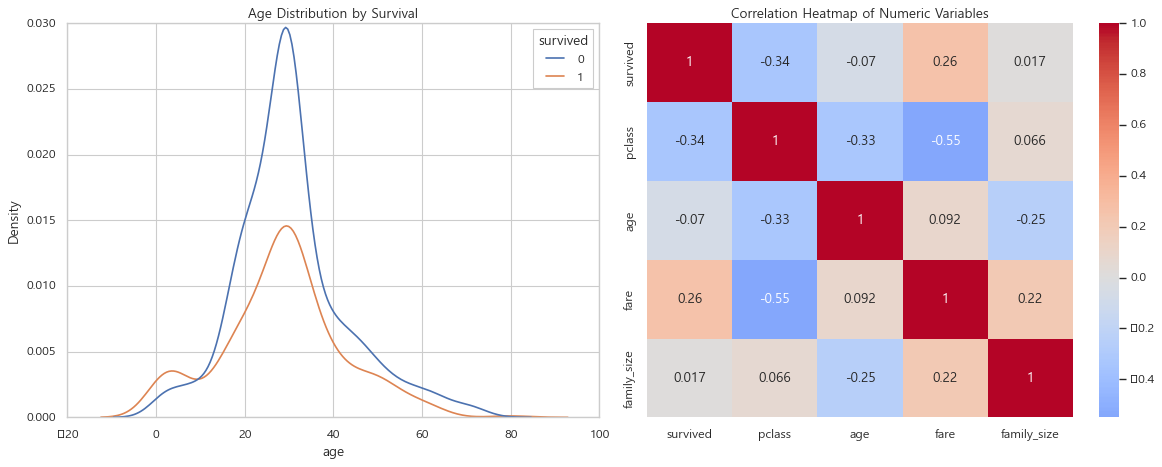

In [10]:
plt.figure(figsize=(15, 6))

# 생존 여부에 따른 나이 분포 (KDE)
plt.subplot(121)
sns.kdeplot(data=df, x='age', hue='survived', multiple="layer")
plt.title('Age Distribution by Survival')

# 수치형 변수 상관관계 히트맵
plt.subplot(122)
numeric_cols = ['survived', 'pclass', 'age', 'fare', 'family_size']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')

plt.tight_layout()
plt.show()